In [9]:
import pymc as pm
import pandas as pd
import arviz as az
import matplotlib.pyplot as plt

az.style.use('arviz-darkgrid')

In [2]:
signups = pd.read_csv("data/control-signups.csv", index_col=0)

<AxesSubplot:>

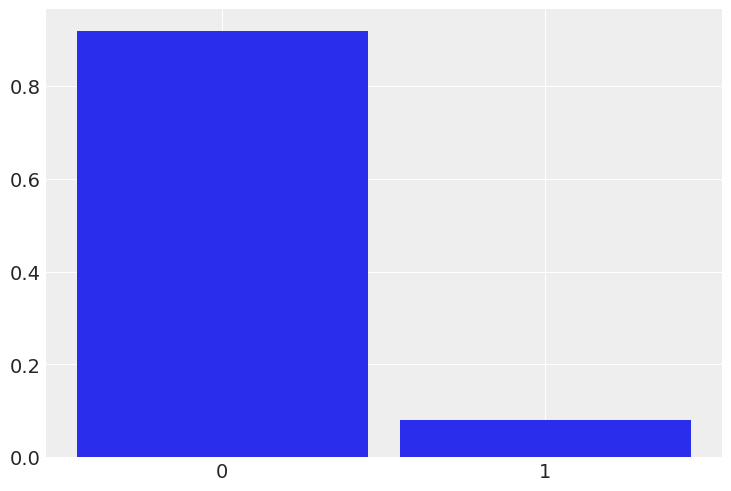

In [5]:
# Plot the distribution of signups
az.plot_dist(signups)

In [6]:
signups

,0
0,0
1,0
2,0
3,0
4,0
...,...
95,0
96,0
97,0
98,0


* `observed` tells PyMC that this variable is our observed data (i.e. our likelihood)
* `conversion_rate`, represents the prior solution space (as do all of our priors).
* We can think of our likelihood as a **plasubility generator**. Essentially, the likelihood tests "how plausible are the values observed given the values in our prior?"

In [8]:
with pm.Model() as model_signups:
    conversion_rate = pm.Beta("conversion_rate", alpha=2, beta=10)
    
    # Define our likelihood - we can think of this as our plausibility generator (i.e. how plasuible are the values in our prior?)
    n_signups = pm.Binomial(
        "n_signups", 
        n=len(signups), 
        p=conversion_rate, 
        observed=signups.sum()
    )
    
    prior_samples = pm.sample_prior_predictive()

## Getting the plausiible values

In [11]:
prior_samples

Inference data with groups:
	> prior
	> prior_predictive
	> observed_data

We can plot our prior below, before seeing any data, to get an idea of our beliefs of conversion rate.

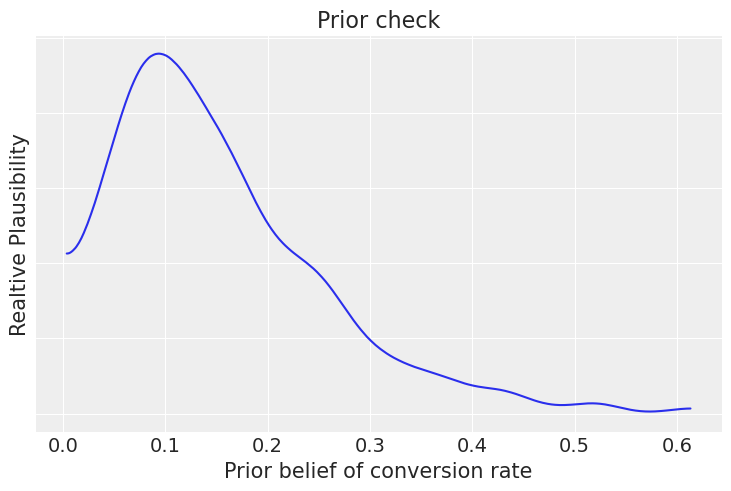

In [10]:
ax = az.plot_dist(prior_samples.prior["conversion_rate"])
ax.set(
    xlabel="Prior belief of conversion rate", 
    ylabel="Realtive Plausibility",
    title="Prior check"
)

plt.tick_params(left=False, labelleft=False)

However, while we should always plot our priors, this doesn't tell us what our assumptions about conversion rates translate to actual signups (or the **data space**). For this, we can construct a **prior predictive check**, which plots our assumptions on the data space.

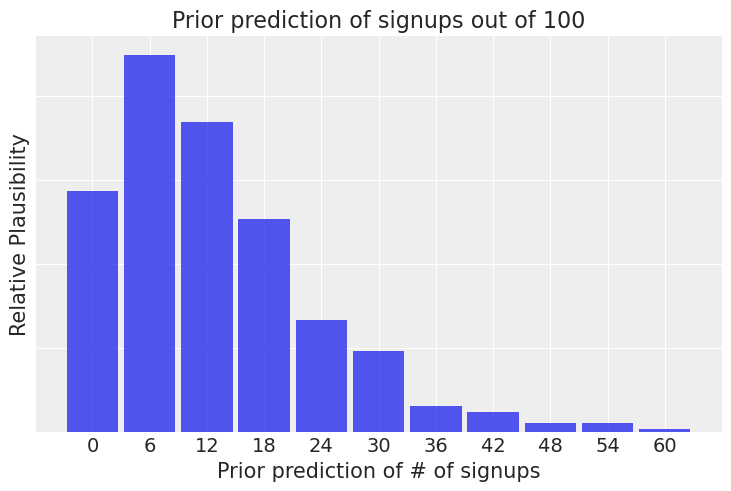

In [25]:
ax = az.plot_dist(
    prior_samples.prior_predictive["n_signups"], hist_kwargs={"alpha": 0.8}
)

ax.set(
    xlabel="Prior prediction of # of signups",
    ylabel="Relative Plausibility",
    title="Prior prediction of signups out of 100"
)

plt.tick_params(left=False, labelleft=False)

Why is prior prediction of signups out of 100? Well, this is because 100 is the size of our data `signups`.

We can think of `plausible_values` as our posterior solution space.

In [26]:
with model_signups:
    plasuible_values = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [conversion_rate]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 7 seconds.
